# **Lab 3: Data Similarity**

Author: Zheng Xinzhe

Slides:

Videos:

Objectives:
* When we need to measure data similarity.
* Know how to use different tools to obtain different evaluation criteria.

If any questions, please contact the TAs via HKU moodle, or email.

Rules:
* 1) This lab consists of two parts. The first part is more like a tutorial, you don't have to do any tasks. The second part is all about tasks, you need to play with the code and answer some questions. For details on how to submit answers, see the specific task.
* 2) The score corresponding to the question is indicated next to each question.
* 3) Again, the grading is not based on how good your results are, but more on what you have explored and how you analyze your methods.

In [47]:
# Before this lab journey, please enter your name and student ID
NAME = "Kang, Zheming"
ID = "3036195746"

## 1. Data Similarity

Measuring data similarity is a very important topic in data mining. For example, when you propose your estimation model, you need to know how good your model is by comparing your prediction with the ground truth. In this lab, we will introduce some basic methods to measure data similarity. We will start from measuring the distance between two data points, and then move on to compare the similarity between two data sets. We will also introduce some methods based on data distribution, which is commonly used as loss function in machine learning.

We will start from the simplest cases, and make you understand the basic concepts of these similarity measurement methods, and also when and how to use them.

### 1.1 Distance Measurement

The technique used to measure distances is determined by the situation at hand. In some cases, the **Euclidean Distance**, for example, can be optimal and useful for computing distances. Other applications, such as the **Cosine Distance**, necessitate a more sophisticated approach to calculating distances between points or observations. The list that follows represents various methods for calculating distances between each pair of data points.

#### 1.1.1 L1 Norm

Also known as **Manhattan Distance**. **L1 Norm** is the sum of the magnitudes of the vectors in a space. It is the most natural way of measure distance between vectors, that is the sum of absolute difference of the components of the vectors. In this norm, all the components of the vector are weighted equally. The formula of **L1 Norm** is given below:

$$\begin{aligned}
L_1 = \sum_{i=1}^n |x_i - y_i|, \ v_1 = \{x_1, x_2, ..., x_n\},  v_2 = \{y_1, y_2, ..., y_n\}
\end{aligned}$$

The reason why it is called **Manhattan Distance** is that the streets of Manhattan are chequered, and the distance you need to walk from one place to another is very close to the definition of the **L1 Norm**.

![avatar](manhattan_distance.png)

In [48]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt

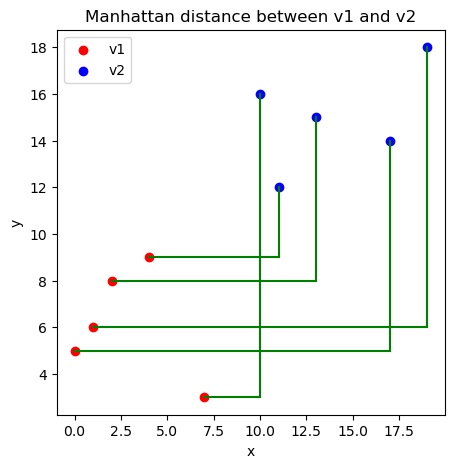

In [49]:
# Give a L1 norm example

# Create two vectors
# set random seed
np.random.seed(0)
v1 = np.random.choice(10, size=(5, 2), replace=False)
v2 = np.random.choice(10, size=(5, 2), replace=False) + 10

# Plot the vectors
plt.figure(figsize=(5, 5))
plt.scatter(v1[:, 0], v1[:, 1], c='r', label='v1')
plt.scatter(v2[:, 0], v2[:, 1], c='b', label='v2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# Plot the manhattan distance between v1 and v2
for i in range(v1.shape[0]):
	plt.plot([v1[i, 0], v2[i, 0]], [v1[i, 1], v1[i, 1]], c='g')
	plt.plot([v2[i, 0], v2[i, 0]], [v1[i, 1], v2[i, 1]], c='g')
plt.title('Manhattan distance between v1 and v2')
plt.show()

In [50]:
# calculate the L1 norm between v1 and v2
L1_norm = np.average(np.linalg.norm(v1 - v2, ord=1, axis=1))
print('L1 norm between v1 and v2 is: {}'.format(L1_norm))

L1 norm between v1 and v2 is: 20.0


#### 1.1.2 L2 Norm

Also known as **Euclidean Distance**. **L2 Norm** is the square root of the sum of the squares of the vectors in a space. The formula of **L2 Norm** is given below:

$$\begin{aligned}
L_2 = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}, \ v_1 = \{x_1, x_2, ..., x_n\},  v_2 = \{y_1, y_2, ..., y_n\}
\end{aligned}$$

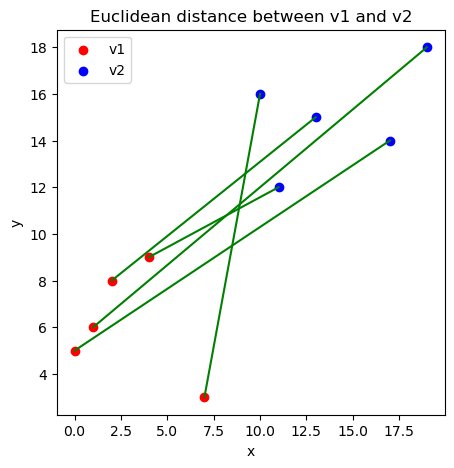

In [51]:
# Give a L2 norm example

# Create two vectors
# set random seed
np.random.seed(0)
v1 = np.random.choice(10, size=(5, 2), replace=False)
v2 = np.random.choice(10, size=(5, 2), replace=False) + 10

# Plot the vectors
plt.figure(figsize=(5, 5))
plt.scatter(v1[:, 0], v1[:, 1], c='r', label='v1')
plt.scatter(v2[:, 0], v2[:, 1], c='b', label='v2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# Plot the euclidean distance between v1 and v2
for i in range(v1.shape[0]):
	plt.plot([v1[i, 0], v2[i, 0]], [v1[i, 1], v2[i, 1]], c='g')

plt.title('Euclidean distance between v1 and v2')
plt.show()

In [52]:
# calculate the L2 norm between v1 and v2
L2_norm = np.average(np.linalg.norm(v1 - v2, ord=2, axis=1))
print('L2 norm between v1 and v2 is: {}'.format(L2_norm))

L2 norm between v1 and v2 is: 14.972906738970163


So, what is the difference between **L1 Norm** and **L2 Norm**? The answer is that **L1 Norm** is more sensitive to outliers than **L2 Norm**. For example, if we have two vectors, $v_1 = \{1, 2, 3, 4, 5\}$ and $v_2 = \{1, 2, 3, 4, 100\}$, the **L1 Norm** of these two vectors is $100$, while the **L2 Norm** is $10$. So, **L2 Norm** is more robust to outliers than **L1 Norm**.

In deep learning, if you take them as loss functions, the advantage of **L1 Norm** is the ability to obtain sparse models, which is important for large-scale problems because it reduces storage space. The disadvantage is that the objective function is not differentiable at the origin point, so special treatment is needed.

**L2 Norm** has the advantage that it is simple to implement and can play a regularization role.

The **Minkowski Distance** is just a generalization of the previous distance metrics: Euclidean, and Manhattan. It is defined as the distance between two observations in the n-D space as the following formula demonstrate:

$$\begin{aligned}
L_p = \left(\sum_{i=1}^n |x_i - y_i|^p\right)^{1/p}, \ v_1 = \{x_1, x_2, ..., x_n\},  v_2 = \{y_1, y_2, ..., y_n\}
\end{aligned}$$


#### 1.1.3 Cosine Distance

The **Cosine Distance** is the angle between two vectors. The formula of **Cosine Distance** is given below:

$$\begin{aligned}
\text{cosine\_distance} = \frac{v_1 \cdot v_2}{||v_1|| \cdot ||v_2||}
\end{aligned}$$

The value of **Cosine Distance** is between $-1$ and $1$. The bigger the value is, the more similar the two vectors are. The value of $0$ means that the two vectors are perpendicular to each other, and the value of $1$ means that the two vectors have the same direction. It should be noticed that the **Cosine Distance** can only measure the angle between two vectors, and cannot measure the distance between two vectors.

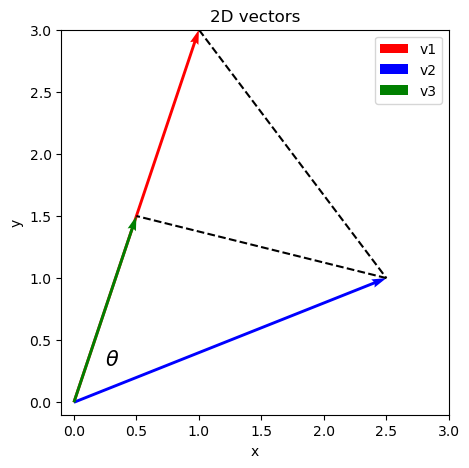

In [53]:
# Plot two vectors in 2D space
import numpy as np
import matplotlib.pyplot as plt

# Create two vectors
v1 = np.array([1, 3])
v2 = np.array([2.5, 1])
v3 = np.array([0.5, 1.5])

# Plot the vectors as arrows
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')
ax.quiver(0, 0, v3[0], v3[1], angles='xy', scale_units='xy', scale=1, color='g', label='v3')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([-0.1, 3])
ax.set_ylim([-0.1, 3])
plt.text(0.25, 0.3, r'$\theta$', fontsize=15)
# plot the distance between v1 and v2
plt.plot([v1[0], v2[0]], [v1[1], v2[1]], c='black', linestyle='--')
plt.plot([v2[0], v3[0]], [v2[1], v3[1]], c='black', linestyle='--')
plt.legend()
plt.title('2D vectors')
plt.show()

Cosine similarity is good at measuring the pattern between two vectors. For example, giving two vectors: $v_1=\{1,2,...,1000\}$ and $v_2=\{1000,1,2,...,999\}$. We cannot somply measure the geometric distance between them.

First, let's calculate the **L2 Norm** of these two vectors:

In [54]:
# create two vectors
v1 = np.arange(1, 1001)
v2 = np.arange(1, 1001)
v2[0] = v1[-1]
v2[1:] = v1[:-1]

# calculate the L2 norm between v1 and v2
L2_norm = np.linalg.norm(v1 - v2, ord=2)
print('L2 norm between v1 and v2 is: {}'.format(L2_norm))

L2 norm between v1 and v2 is: 999.499874937461


Then, let's calculate the **Cosine Distance** of these two vectors:

In [55]:
# calculate the cosine similarity between v1 and v2
cos_sim = np.dot(v1.T, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
print('Cosine similarity between v1 and v2 is: {}'.format(cos_sim))

Cosine similarity between v1 and v2 is: 0.9985037451304316


Comparing with **L2 Norm**, **Cosine Distance** gives a completely opposite result.

(0.0, 10.0)

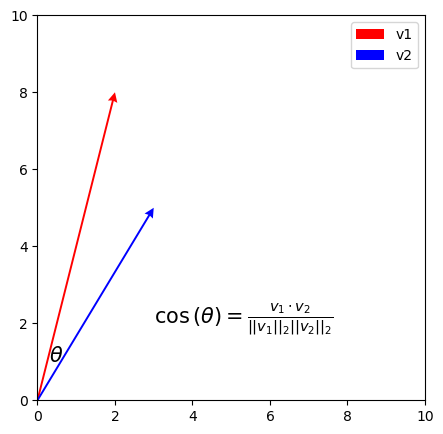

In [56]:
# Give a cosine similarity example
# Create two vectors
# set random seed
np.random.seed(0)
v1 = np.random.choice(10, size=(2, 1), replace=False)
v2 = np.random.choice(10, size=(2, 1), replace=False)

# Plot the vectors
plt.figure(figsize=(5, 5))
# arrow
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1', width=0.005, headwidth=5)
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2', width=0.005, headwidth=5)
# label the angle between v1 and v2
plt.text(0.3, 1, r'$\theta$', fontsize=15)
# label the formula
plt.text(3, 2, r'$\cos {(\theta)} = \frac{v_1 \cdot v_2}{||v_1||_2 ||v_2||_2}$', fontsize=15)
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 10)

### 1.2 Probability Density Similarity

The above measurement methods mainly focus on vectors. In this part, we will introduce some methods to measure the similarity between two probability distributions. Different from the measurement methods above, we need to compare the statistical characteristics of the datasets, or the probability dense functions.

#### 1.2.1 KL Divergence

We will first introduce **KL Divergence**. What if we know the probability density of the two distributions? We can use **KL Divergence** to measure the similarity between the two distributions. The formula of **KL Divergence** is given below:

$$\begin{aligned}
KL(P||Q) = \sum_{i=1}^n P(x_i) \log \frac{P(x_i)}{Q(x_i)}
\end{aligned}$$

In [57]:
import numpy as np
import scipy.stats
from scipy.stats import norm

# Define a function to calculate the KL divergence
def kl_divergence(p, q):
	return np.sum(np.where(p != 0, p * np.log(p / q), 0))

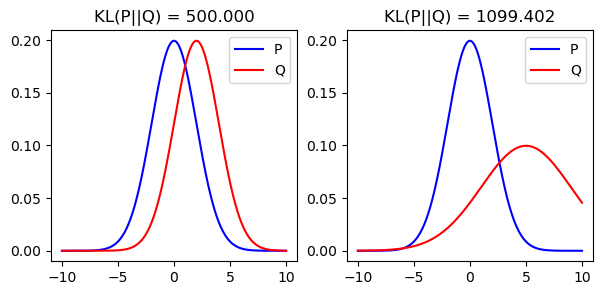

In [58]:
x = np.arange(-10, 10, 0.001)
# Generate two normal distributions
p = norm.pdf(x, 0, 2)
q = np.array([norm.pdf(x, 2, 2), norm.pdf(x, 5, 4)])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
for i in range(2):
	ax[i].plot(x, p, c='blue', label='P')
	ax[i].plot(x, q[i], c='red', label='Q')
	ax[i].title.set_text('KL(P||Q) = %1.3f' % kl_divergence(p, q[i]))
	ax[i].legend()

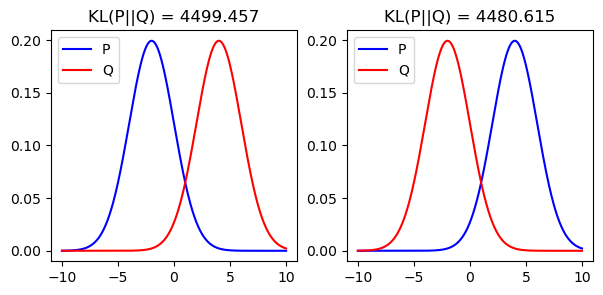

In [59]:
x = np.arange(-10, 10, 0.001)
# Generate two normal distributions
p = np.array([norm.pdf(x, -2, 2), norm.pdf(x, 4, 2)])
q = np.array([norm.pdf(x, 4, 2), norm.pdf(x, -2, 2)])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
for i in range(2):
	ax[i].plot(x, p[i], c='blue', label='P')
	ax[i].plot(x, q[i], c='red', label='Q')
	ax[i].title.set_text('KL(P||Q) = %1.3f' % kl_divergence(p[i], q[i]))
	ax[i].legend()

The value of **KL Divergence** is between $0$ and $\infty$. The smaller the value is, the more similar the two distributions are. The value of $0$ means that the two distributions are the same, and the value of $\infty$ means that the two distributions are independent.

#### 1.2.2 Jensen-Shannon Divergence

**Jensen-Shannon Divergence** is a commonly used loss function in machine learning. The first paper on GAN network model uses this method to generate data distribution that approximates the input. The formula of **Jensen-Shannon Divergence** is given below:

$$\begin{aligned}
JS(P||Q) = \frac{1}{2} KL(P||M) + \frac{1}{2} KL(Q||M)
\end{aligned}$$
where $M = \frac{1}{2}(P + Q)$

It is based on the **Kullback–Leibler Divergence**, with some notable (and useful) differences, including that it is symmetric (KL Divergence is not symmetric) and it always has a finite value.

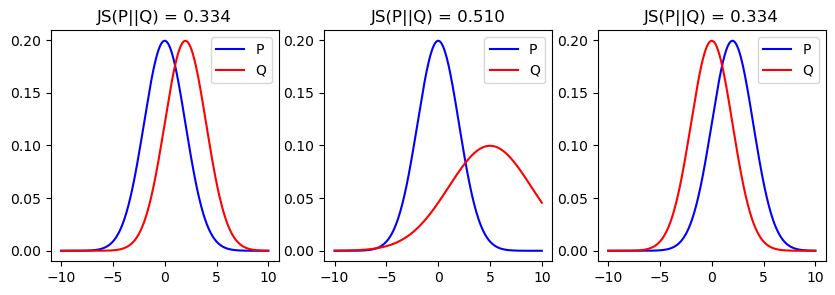

In [60]:
# import package
from scipy.spatial.distance import jensenshannon

x = np.arange(-10, 10, 0.001)
# Generate two normal distributions
p = np.array([norm.pdf(x, 0, 2), norm.pdf(x, 0, 2), norm.pdf(x, 2, 2)])
q = np.array([norm.pdf(x, 2, 2), norm.pdf(x, 5, 4), norm.pdf(x, 0, 2)])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
for i in range(3):
	ax[i].plot(x, p[i], c='blue', label='P')
	ax[i].plot(x, q[i], c='red', label='Q')
	ax[i].title.set_text('JS(P||Q) = %1.3f' % jensenshannon(p[i], q[i]))
	ax[i].legend()

But **Jensen-Shannon Divergence** has its limitations. For example, if the two distributions are independent, the value of **Jensen-Shannon Divergence** will be a constant number, no matter how far the two distributions are.

<img src="jsdivergence.png" width=500>

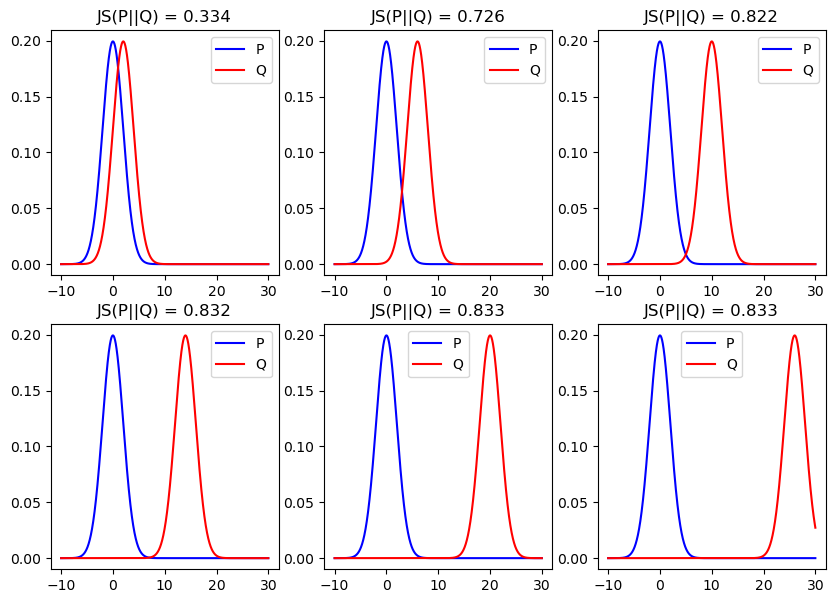

In [61]:
# import package
from scipy.spatial.distance import jensenshannon

x = np.arange(-10, 30, 0.01)
# Generate two normal distributions
p = norm.pdf(x, 0, 2)
q = np.array([[norm.pdf(x, 2, 2), norm.pdf(x, 6, 2), norm.pdf(x, 10, 2)],
			  [norm.pdf(x, 14, 2), norm.pdf(x, 20, 2), norm.pdf(x, 26, 2)]])

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
for i in range(2):
	for j in range(3):
		ax[i][j].plot(x, p, c='blue', label='P')
		ax[i][j].plot(x, q[i][j], c='red', label='Q')
		ax[i][j].title.set_text('JS(P||Q) = %1.3f' % jensenshannon(p, q[i][j]))
		ax[i][j].legend()

You can see from the output result that even the distance between $P$ and $q$ increases, the value of **Jensen-Shannon Divergence** remains the same in the end.

In this case, we need a more powerful method to measure the similarity between two distributions, that is **Earth Mover’s Distance**.

#### 1.2.3 Earth Mover's Distance

In statistics, the **Earth Mover's Distance** (EMD) is a measure of the distance between two probability distributions over a region D. In mathematics, this is known as the Wasserstein metric. Informally, if the distributions are interpreted as two different ways of piling up a certain amount of earth (dirt) over the region D, the EMD is the minimum cost of turning one pile into the other; where the cost is assumed to be the amount of dirt moved times the distance by which it is moved.

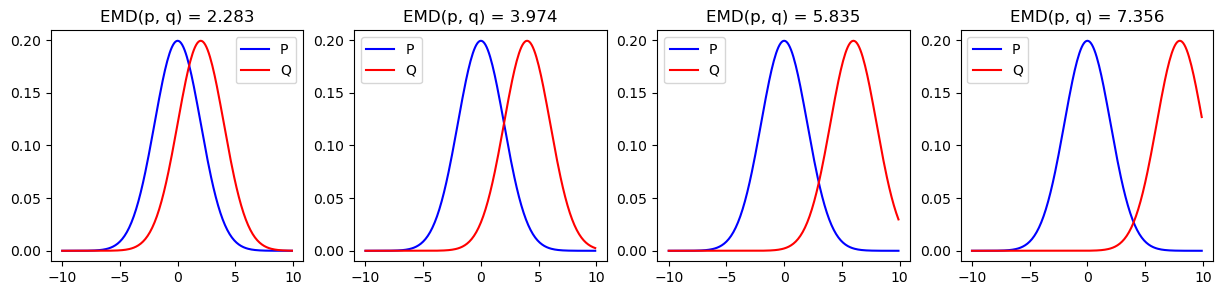

In [62]:
# Give a EMD example
from scipy.stats import wasserstein_distance

x = np.arange(-10, 10, 0.1)
# Generate two normal distributions
p = norm.pdf(x, 0, 2)
q = np.array([norm.pdf(x, 2, 2), norm.pdf(x, 4, 2), norm.pdf(x, 6, 2), norm.pdf(x, 8, 2)])

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
for i in range(4):
	ax[i].plot(x, p, c='blue', label='P')
	ax[i].plot(x, q[i], c='red', label='Q')
	ax[i].title.set_text('EMD(p, q) = %1.3f' % wasserstein_distance(x, p, q[i]))
	ax[i].legend()

If we have two probability distributions $P$ and $Q$, the **Earth Mover's Distance** is defined as the minimum amount of dirt that needs to be moved to transform $P$ into $Q$. The formula of **Earth Mover's Distance** is given below:

$$\begin{aligned}
EMD(P, Q) = \inf_{\pi \in \Pi(P, Q)} \sum_{i, j} \pi_{i, j} \cdot d(x_i, y_j)
\end{aligned}$$

where $\Pi(P, Q)$ is the set of all joint distributions between $P$ and $Q$, and $d(x_i, y_j)$ is the distance between $x_i$ and $y_j$.

The methodologies metioned above are just a small part of the distribution similarity measurement methods. If you are interested in this topic, you can refer to the following resources:
https://medium.com/geekculture/techniques-to-measure-probability-distribution-similarity-9145678d68a6

http://www.fisica.edu.uy/~cris/teaching/Cha_pdf_distances_2007.pdf


### 1.3 Dynamic Time Warping

Sometimes, we need to compare sequences in time sequence similarity, so we need to consider the characteristics of time when comparing. For example, if two sequences are different in time but have the same shape (as shown below), they will be different if the method introduced earlier, such as the L2 norm, is used. In order to reflect the characteristics of sequence in time, we need to introduce a new measure: **Dynamic Time Warping**.

<img src="https://rtavenar.github.io/blog/fig/dtw_vs_euc.svg" width=500 height=250 />

By finding the point at which the two waves are aligned, DTW can calculate their distance correctly.

The DTW algorithm operates as follows:

Suppose we have two sequences $X=\{x_1,x_2,...,x_N\}, Y=\{y_1,y_2,...,y_M\}$, and a distance matrix $D[i,j]=f(x_i,y_j)$, where $f$ is a distance function, usually the Euclidean distance.

The core of DTW lies in solving Warping Curve or warping path, that is, the correspondence between dots. $\Phi(k)=(\Phi_x(k), \Phi_y(k))$ is used to represent the correspondence between the dots of two sequences. The possible value of $\Phi_x(k)$ can be asignned to $1,2,...,N$, and $\Phi_y(k)$ can be assigned to $1,2,...,M$. For example, if $\Phi(k)=(\Phi_x(1), \Phi_y(2))$, then that means that the first point on the x-curve corresponds to the second point on the y-curve. Given a certain correspondence policy $\Phi(k)$, the accumulative distance between the two sequences is defined as:

$$\begin{aligned}
D_{\Phi}(X,Y) = \sum_{k=1}^K D[\Phi_x(k), \Phi_y(k)]
\end{aligned}$$

The final output of DTW is to find the best policy $\Phi(k)$ that has the smallest cumulative distance:

$$\begin{aligned}
DTW_{\Phi}(X,Y) = \arg \min_{\Phi(k)} D_{\Phi}(X,Y)
\end{aligned}$$

Please download python package: dtw-python.
```pip install dtw-python```

<Axes: xlabel='Index', ylabel='Query value'>

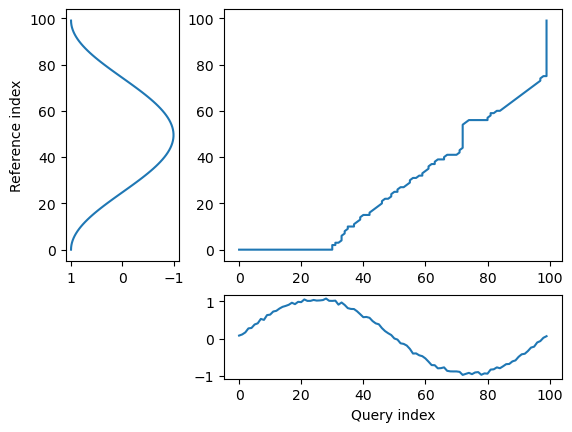

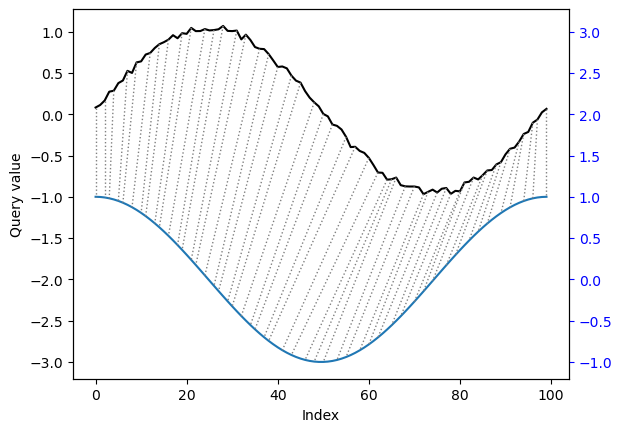

In [63]:
# Give a DTW example
from dtw import *

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
	step_pattern=rabinerJuangStepPattern(6, "c"))\
	.plot(type="twoway",offset=-2)

The above picture shows the alignment of two sequences, after DTW, we can better reflect the similarity between the two sequences.

## 2. Applying Similarity to WiFi Localization (5 points)

In Lab 2, you have learned the basic idea of WiFi sensing, and also the components of WiFi sensing, which is channel state information (CSI). In this lab, we will introduce **WiFi Localization** by using CSI similarity measurement.

In wireless communications, channel state information (CSI) refers to known channel properties of a communication link. This information describes how a signal propagates from the transmitter to the receiver. So, it can change rapidly when the WiFi transmitter or receiver moves. Based on this characteristic, the CSI can be taken as the location fingerprint.

In this task, we will first introduce how to compare the CSI of two WiFi signals, and then you need to design your own method to identify the location of the given WiFI CSI. You will also encounter how to detect the movement of the WiFi receiver at the end of this task.

**Attention**: Please complete the code when you see the comment "YOUR CODE HERE" and "END OF YOUR CODE". And you have to answer the questions in the corresponding cells.

**Scoring Rubric**
* 1) CSI similarity measurement (1 point)
* 2) TRRS for CSI: a specific method for CSI similarity (1 point)
* 3) Error analysis: you need to use different data similarity measurement methods, or even design your own method to better distinguish CSI from different locations. (1 point)
* 4) Location Prediction: with the above methods you discovered and developed, you need to predict the location of a given CSI, then calculate the prediction error. (1 point)
* 5) Movement Detection: data similarity could also be used for movement detection. (1 point)

### 2.1 CSI Similarity Measurement (1 point)

Based on the aforementioned data similarity methods, you are required to use **at least three** different methods (e.g., L1 Norm, L2 Norm, Dynamic Time Warping, etc. You can also explore other methods that are not mentioned in this lab.) to measure the similarity between WiFi CSI data collected from different locations.

Let us understand the experiment setting first. The following pictures shows the locations of receivers (Rx) and transmitters (Tx).

<img src="LocationMap.png" width=360 height=275 />

Among seven different locations, A, B, C, D, E, and F are within one desk, and G is in another desk, which means A, B, C, D, E, F are very close to each other.

You will have 50 CSI data from each location. Let's first have a look at how the CSI data is composed. Take Place A as an example:

In [64]:
placeA = np.load('./csi_data/PlaceA_csi.npy')
print("The number of CSI data in PlaceA is: ", placeA.shape[0])
print("The number of links in PlaceA is: ", placeA.shape[1])
print("The number of subcarriers in PlaceA is: ", placeA.shape[2])

The number of CSI data in PlaceA is:  50
The number of links in PlaceA is:  4
The number of subcarriers in PlaceA is:  242


As you can see, the CSI data contains 50 samples, with each sample containing 242 subcarriers. And because the Tx and Rx have two antennas, the transmission process contains 4 parts: Rx1-Tx1, Rx1-Tx2, Rx2-Tx1, Rx2-Tx2, resulting in four links. In other words, the CSI data for each location is basically a 2x2x242x50 matrix, and each element is a complex number.

**Attention**: As the CSI data contains several pilot subcarriers, which do not contain any channel information, we will remove them before we do the similarity measurement.

In [65]:
# Import static CSI data
import scipy.io as scio

# Choose the first link
link_number = 0

placeA = np.load('./csi_data/PlaceA_csi.npy')
placeA = placeA[:, link_number, :]
placeA = np.abs(placeA)
placeB = np.load('./csi_data/PlaceB_csi.npy')
placeB = placeB[:, link_number, :]
placeB = np.abs(placeB)
placeC = np.load('./csi_data/PlaceC_csi.npy')
placeC = placeC[:, link_number, :]
placeC = np.abs(placeC)
placeD = np.load('./csi_data/PlaceD_csi.npy')
placeD = placeD[:, link_number, :]
placeD = np.abs(placeD)
placeE = np.load('./csi_data/PlaceE_csi.npy')
placeE = placeE[:, link_number, :]
placeE = np.abs(placeE)
placeF = np.load('./csi_data/PlaceF_csi.npy')
placeF = placeF[:, link_number, :]
placeF = np.abs(placeF)
placeX = np.load('./csi_data/PlaceX_csi.npy')
placeX = placeX[:, link_number, :]
placeX = np.abs(placeX)

# Pilot subcarriers indexes
pilot_subcarrier = [6, 32, 74, 100, 141, 167, 209, 235]
# Delete pilot subcarriers (no information provided)
placeA = np.delete(placeA, pilot_subcarrier, axis=1)
placeB = np.delete(placeB, pilot_subcarrier, axis=1)
placeC = np.delete(placeC, pilot_subcarrier, axis=1)
placeD = np.delete(placeD, pilot_subcarrier, axis=1)
placeE = np.delete(placeE, pilot_subcarrier, axis=1)
placeF = np.delete(placeF, pilot_subcarrier, axis=1)
placeX = np.delete(placeX, pilot_subcarrier, axis=1)

# Do nomalization for each subcarrier
placeA = (placeA.T / np.linalg.norm(placeA, axis=1)).T
placeB = (placeB.T / np.linalg.norm(placeB, axis=1)).T
placeC = (placeC.T / np.linalg.norm(placeC, axis=1)).T
placeD = (placeD.T / np.linalg.norm(placeD, axis=1)).T
placeE = (placeE.T / np.linalg.norm(placeE, axis=1)).T
placeF = (placeF.T / np.linalg.norm(placeF, axis=1)).T
placeX = (placeX.T / np.linalg.norm(placeX, axis=1)).T

# Subtract mean value of all subcarriers
placeA = placeA - np.mean(placeA)
placeB = placeB - np.mean(placeB)
placeC = placeC - np.mean(placeC)
placeD = placeD - np.mean(placeD)
placeE = placeE - np.mean(placeE)
placeF = placeF - np.mean(placeF)
placeX = placeX - np.mean(placeX)

combined = np.concatenate((placeA, placeB, placeC, placeD, placeE, placeF, placeX), axis=0)

Text(0.5, 0.92, 'Place X')

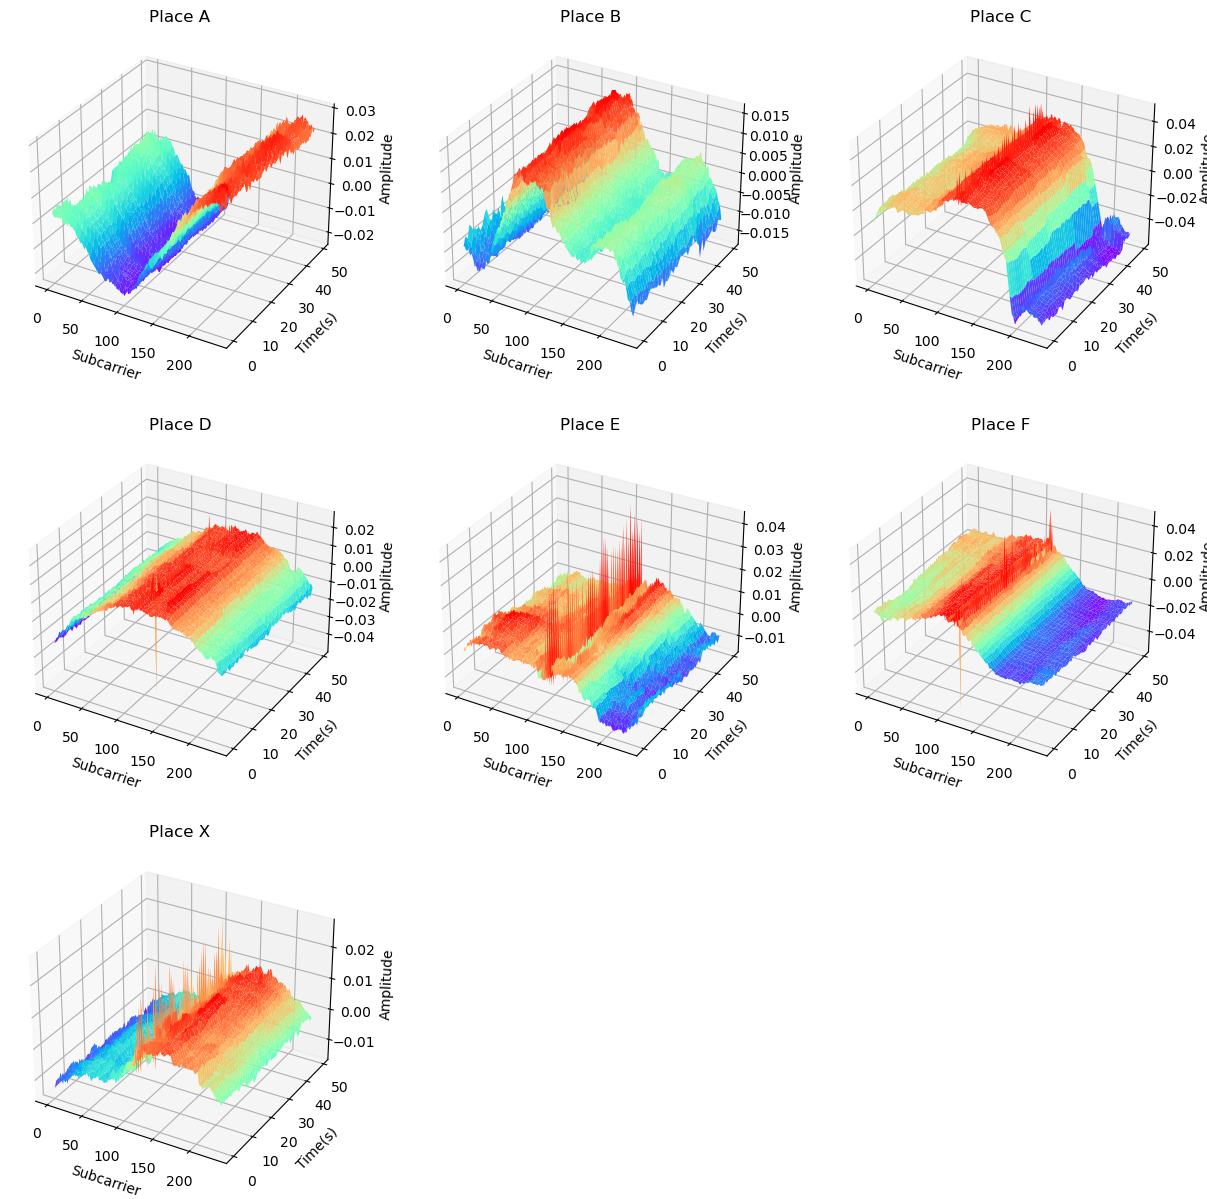

In [66]:
# plot the meshgrid of place A, B, C, D, E, F, X in one figure

# import package
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plot the meshgrid of place A, B, C, D, E, F, X in subplots
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(331, projection='3d')
X = np.arange(0, placeA.shape[1], 1)
Y = np.arange(0, placeA.shape[0], 1)
X, Y = np.meshgrid(X, Y)
Z = placeA
surf = ax1.plot_surface(X, Y, Z, cmap='rainbow')
ax1.set_ylabel('Time(s)')
ax1.set_xlabel('Subcarrier')
ax1.set_zlabel('Amplitude')
ax1.set_title('Place A')

ax2 = fig.add_subplot(332, projection='3d')
X = np.arange(0, placeB.shape[1], 1)
Y = np.arange(0, placeB.shape[0], 1)
X, Y = np.meshgrid(X, Y)
Z = placeB
surf = ax2.plot_surface(X, Y, Z, cmap='rainbow')
ax2.set_ylabel('Time(s)')
ax2.set_xlabel('Subcarrier')
ax2.set_zlabel('Amplitude')
ax2.set_title('Place B')

ax3 = fig.add_subplot(333, projection='3d')
X = np.arange(0, placeC.shape[1], 1)
Y = np.arange(0, placeC.shape[0], 1)
X, Y = np.meshgrid(X, Y)
Z = placeC
surf = ax3.plot_surface(X, Y, Z, cmap='rainbow')
ax3.set_ylabel('Time(s)')
ax3.set_xlabel('Subcarrier')
ax3.set_zlabel('Amplitude')
ax3.set_title('Place C')

ax4 = fig.add_subplot(334, projection='3d')
X = np.arange(0, placeD.shape[1], 1)
Y = np.arange(0, placeD.shape[0], 1)
X, Y = np.meshgrid(X, Y)
Z = placeD
surf = ax4.plot_surface(X, Y, Z, cmap='rainbow')
ax4.set_ylabel('Time(s)')
ax4.set_xlabel('Subcarrier')
ax4.set_zlabel('Amplitude')
ax4.set_title('Place D')

ax5 = fig.add_subplot(335, projection='3d')
X = np.arange(0, placeE.shape[1], 1)
Y = np.arange(0, placeE.shape[0], 1)
X, Y = np.meshgrid(X, Y)
Z = placeE
surf = ax5.plot_surface(X, Y, Z, cmap='rainbow')
ax5.set_ylabel('Time(s)')
ax5.set_xlabel('Subcarrier')
ax5.set_zlabel('Amplitude')
ax5.set_title('Place E')

ax6 = fig.add_subplot(336, projection='3d')
X = np.arange(0, placeF.shape[1], 1)
Y = np.arange(0, placeF.shape[0], 1)
X, Y = np.meshgrid(X, Y)
Z = placeF
surf = ax6.plot_surface(X, Y, Z, cmap='rainbow')
ax6.set_ylabel('Time(s)')
ax6.set_xlabel('Subcarrier')
ax6.set_zlabel('Amplitude')
ax6.set_title('Place F')

ax7 = fig.add_subplot(337, projection='3d')
X = np.arange(0, placeX.shape[1], 1)
Y = np.arange(0, placeX.shape[0], 1)
X, Y = np.meshgrid(X, Y)
Z = placeX
surf = ax7.plot_surface(X, Y, Z, cmap='rainbow')
ax7.set_ylabel('Time(s)')
ax7.set_xlabel('Subcarrier')
ax7.set_zlabel('Amplitude')
ax7.set_title('Place X')

The discrepancy between the CSI data can be obversed.

In the reaming part of this section, you are required to use at least three methods to measure the similarity between the CSI data whithin or between different locations. You can use the methods introduced in this lab, or you can discover other methods that are not mentioned in this lab. You can also design your own method to measure the similarity between the CSI data. You are encouraged to show some quantitative results to demonstrate the effectiveness of your method. Visualization of the results is also encouraged.

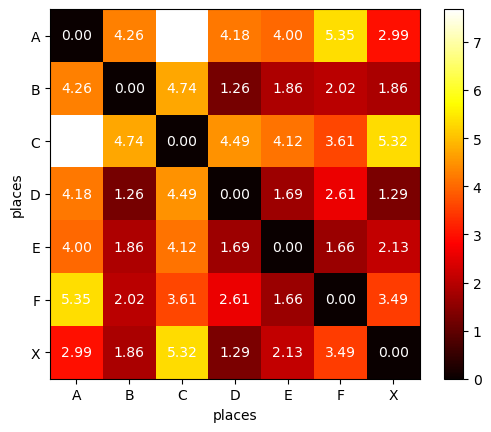

In [67]:
# YOUR CODE HERE
# L1 norm 
# calculate the L1 norm between v1 and v2
import numpy as np

L1_norm = np.zeros((7, 7))
Places = [placeA, placeB, placeC, placeD, placeE, placeF, placeX]
for i in range(7):
    for j in range(7):
        L1_norm[i][j]= np.average(np.linalg.norm(Places[i] - Places[j], ord=1, axis=1))
# print(L1_norm)

plt.imshow(L1_norm, cmap='hot', interpolation='nearest')
for i in range(7):
    for j in range(7):
        plt.text(j, i, f'{L1_norm[i, j]:.2f}', ha='center', va='center', color='white')
plt.xticks(range(7), ['A', 'B', 'C', 'D', 'E', 'F', 'X'])
plt.yticks(range(7), ['A', 'B', 'C', 'D', 'E', 'F', 'X'])
plt.colorbar()
plt.xlabel('places')
plt.ylabel('places')
plt.show()


From the result above we can see a heatmap which represents the L1 norm value between different places. </br>
Both x and y axises are places label. The values in the matrix is the result of L1 norm for the signals from different places.</br>
Diagonal values are zero because when we calculate L1 norm, we have ```Places[i] - Places[j]``` , which will return 0.

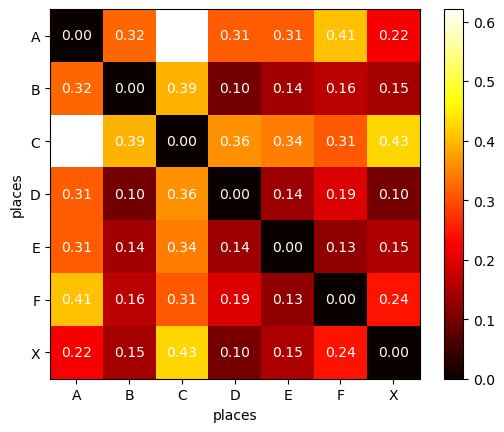

In [68]:
# L2 norm
L2_norm = np.zeros((7, 7))
Places = [placeA, placeB, placeC, placeD, placeE, placeF, placeX]
for i in range(7):
    for j in range(7):
        L2_norm[i][j]= np.average(np.linalg.norm(Places[i] - Places[j], ord=2, axis=1))
# print(L2_norm)

plt.imshow(L2_norm, cmap='hot', interpolation='nearest')
for i in range(7):
    for j in range(7):
        plt.text(j, i, f'{L2_norm[i, j]:.2f}', ha='center', va='center', color='white')
plt.xticks(range(7), ['A', 'B', 'C', 'D', 'E', 'F', 'X'])
plt.yticks(range(7), ['A', 'B', 'C', 'D', 'E', 'F', 'X'])
plt.colorbar()
plt.xlabel('places')
plt.ylabel('places')
plt.show()

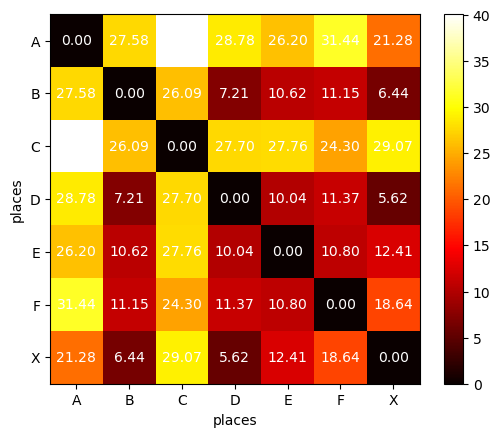

In [69]:
# dtw
# in this part, we could get the distance of alignment so that we can plot a matrix to see the similarities between places
# we first compute the dtw, then, get the distance, and finally store them into alignment matrix
# *Notice* since the shape of placeN is (50, 2xx), we need to get the transpose of placeN to fit the function
from dtw import *
Places = [placeA, placeB, placeC, placeD, placeE, placeF, placeX] 
alignment = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        alignment[i][j] = dtw(Places[i].T, Places[j].T, keep_internals=True).distance
plt.imshow(alignment, cmap='hot', interpolation='nearest')
for i in range(7):
    for j in range(7):
        plt.text(j, i, f'{alignment[i, j]:.2f}', ha='center', va='center', color='white')
plt.xticks(range(7), ['A', 'B', 'C', 'D', 'E', 'F', 'X'])
plt.yticks(range(7), ['A', 'B', 'C', 'D', 'E', 'F', 'X'])
plt.colorbar()
plt.xlabel('places')
plt.ylabel('places')
plt.show()
# END OF YOUR CODE

### 2.2 TRRS & Multiple CSIs From The Same Location (1 point)

In this part, we will introduce a specific method for WiFi localization, which is called **TRRS**. **TRRS** is an application of "time reversal focusing effect". Suppose the station receives two CSI data (in channel frequency response mode, CFR) from the AP, that is $H_1$ and $H_2$, seperately. The TRRS value of these two CSI vecotr can be calculated by the following equation:
$$ {\rm{TRRS}}=\frac{\left|{H_1}^{\rm{T}} H_2^*\right|^2}{\langle H_1,H_1 \rangle\langle H_2,H_2 \rangle} $$
where the symbol $*$ represents the conjugate operation. 

Note that $H_1$ and $H_2$ are complex CSI here. One common issue of CSI data is the phase offset, you do not need to understand this concept in this lab, as we will provide phase cleaning function for you. The function `sanitization()` has been provided below for this purpose.

Let's see how **TRRS** workds.

**Attention**: `sanitization()` is called before calculating the **TRRS** value.

In [70]:
# function to calculate TRRS
from cmath import pi
import math

# the sanitization function is given to eliminate the phase offset
def sanitization(x):
	F = len(x)
	phase = np.angle(x)
	phase = np.unwrap(phase)
	a = (phase[-1]-phase[0])/(2*pi*F)
	b = sum(phase)/F

	firstpart = (np.arange(F)+1)*a
	secondpart = np.ones(F)*b
	phase = phase - firstpart - secondpart

	return x * np.exp(1j*phase)

def trrs(h1, h2):
	# use sanitization to eliminate the phase offset
	h1 = sanitization(h1)
	h2 = sanitization(h2)
	# please complete the founction to calculate TRRS between h1 and h2 with the given formula
	# YOUR CODE HERE
	above = np.abs(np.dot(h1.T, np.conjugate(h2)))**2
	beneath = np.dot(np.vdot(h1, h1), np.vdot(h2, h2))
	output = above/beneath
	# END OF YOUR CODE
	return output

As you have known how to calculate the TRRS between two CSI data, you can calculate the TRRS value between any two CSI data and draw a TRRS matrix graph.

The following CSI data is collected from a static AP, so in theory, the TRRS value between any two CSI datas should be $1$.

C:\Users\sygra\AppData\Local\Temp\ipykernel_32752\3398942741.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  static_csi_matrix[i][j] = trrs((static_csi[i]), (static_csi[j]))
C:\Users\sygra\AppData\Local\Temp\ipykernel_32752\3398942741.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('jet')


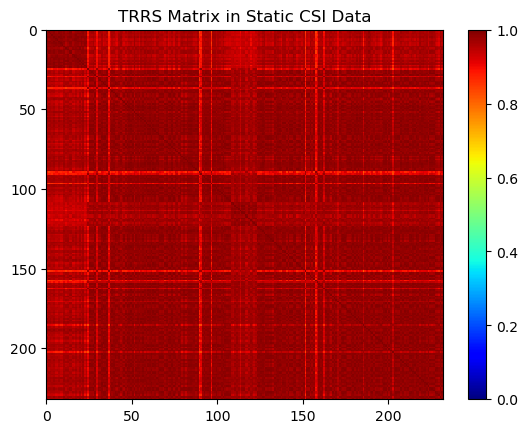

In [71]:
# import static CSI data
import scipy.io as scio

staticcsi_filepath = './csi_data/static_csi.mat'
static_csi = scio.loadmat(staticcsi_filepath)['csi_data']

# Calculate TRRS value between every two CSI data
static_csi_matrix = np.zeros((len(static_csi), len(static_csi)))

for i in range(len(static_csi)):
	for j in range(len(static_csi)):
		static_csi_matrix[i][j] = trrs((static_csi[i]), (static_csi[j]))

cm = plt.cm.get_cmap('jet')
plt.pcolormesh(static_csi_matrix, cmap=cm)
plt.colorbar()
plt.gca().invert_yaxis()
plt.clim(0,1)
plt.title('TRRS Matrix in Static CSI Data')
plt.show()

The TRRS matrix shows that the TRRS value between any two CSI data is almost $1$, which means that the CSI is collected from a static environment.

To further verify the effectiveness of TRRS method, let's test **TRRS** on the CSI data collected from different locations. You just need to run the code in this part and see what will happen.

In [72]:
# import static CSI data
import scipy.io as scio

# Choose the first link
link_number = 0

placeA = np.load('./csi_data/PlaceA_csi.npy')
placeA = placeA[:, link_number, :]
placeA = np.abs(placeA)
placeB = np.load('./csi_data/PlaceB_csi.npy')
placeB = placeB[:, link_number, :]
placeB = np.abs(placeB)
placeC = np.load('./csi_data/PlaceC_csi.npy')
placeC = placeC[:, link_number, :]
placeC = np.abs(placeC)
placeD = np.load('./csi_data/PlaceD_csi.npy')
placeD = placeD[:, link_number, :]
placeD = np.abs(placeD)
placeE = np.load('./csi_data/PlaceE_csi.npy')
placeE = placeE[:, link_number, :]
placeE = np.abs(placeE)
placeF = np.load('./csi_data/PlaceF_csi.npy')
placeF = placeF[:, link_number, :]
placeF = np.abs(placeF)
placeX = np.load('./csi_data/PlaceX_csi.npy')
placeX = placeX[:, link_number, :]
placeX = np.abs(placeX)

# Pilot subcarriers indexes
pilot_subcarrier = [6, 32, 74, 100, 141, 167, 209, 235]
# Delete pilot subcarriers (no information provided)
placeA = np.delete(placeA, pilot_subcarrier, axis=1)
placeB = np.delete(placeB, pilot_subcarrier, axis=1)
placeC = np.delete(placeC, pilot_subcarrier, axis=1)
placeD = np.delete(placeD, pilot_subcarrier, axis=1)
placeE = np.delete(placeE, pilot_subcarrier, axis=1)
placeF = np.delete(placeF, pilot_subcarrier, axis=1)
placeX = np.delete(placeX, pilot_subcarrier, axis=1)

# Do nomalization for each subcarrier
placeA = (placeA.T / np.linalg.norm(placeA, axis=1)).T
placeB = (placeB.T / np.linalg.norm(placeB, axis=1)).T
placeC = (placeC.T / np.linalg.norm(placeC, axis=1)).T
placeD = (placeD.T / np.linalg.norm(placeD, axis=1)).T
placeE = (placeE.T / np.linalg.norm(placeE, axis=1)).T
placeF = (placeF.T / np.linalg.norm(placeF, axis=1)).T
placeX = (placeX.T / np.linalg.norm(placeX, axis=1)).T

# Subtract mean value of all subcarriers
placeA = placeA - np.mean(placeA)
placeB = placeB - np.mean(placeB)
placeC = placeC - np.mean(placeC)
placeD = placeD - np.mean(placeD)
placeE = placeE - np.mean(placeE)
placeF = placeF - np.mean(placeF)
placeX = placeX - np.mean(placeX)

combined = np.concatenate((placeA, placeB, placeC, placeD, placeE, placeF, placeX), axis=0)

C:\Users\sygra\AppData\Local\Temp\ipykernel_32752\152514063.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  csi_matrix[i][j] = trrs((combined[i]), (np.abs(combined[j])))
C:\Users\sygra\AppData\Local\Temp\ipykernel_32752\152514063.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('jet')


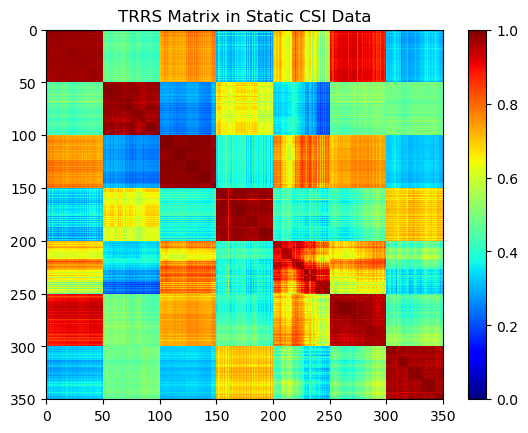

In [73]:
# Calculate TRRS value between every two CSI data
csi_matrix = np.zeros((len(combined), len(combined)))

for i in range(len(combined)):
	for j in range(len(combined)):
		csi_matrix[i][j] = trrs((combined[i]), (np.abs(combined[j])))

cm = plt.cm.get_cmap('jet')
plt.pcolormesh(csi_matrix, cmap=cm)
plt.colorbar()
plt.gca().invert_yaxis()
plt.clim(0,1)
plt.title('TRRS Matrix in Static CSI Data')
plt.show()

In the above experiment, we used link one for demonstration. And the result shows that by using TRRS, we can somehow differentiate the CSI datas from different locations. But some TRRS value of two different places can be very close to $1$, too.

Is there any way to improve the TRRS results? The answer is yes. In the previous experiment, we only used one link to calculate the TRRS value. Actually, we could combine multiple links together to improve the TRRS results.

The following formula is the improved version of TRRS. To better differenciate CSI from different locations, we need to use full of four links. More general, suppose there are $N$ links. The CSI measured at time $t$ is $H(t)=\{H_{1}(t),H_{2}(t),...,H_{N}(t)\}$, where $H_{k}(t)$ is the CSI in the $k$ th link. We then take the average TRRS of all $N$ links as:
$$
\bar\kappa\left(H(t_i),H(t_j)\right)=\frac{1}{N}\sum_{k=1}^{N}\kappa\left(H_{k}(t_i),H_{k}(t_j)\right)
$$

In [74]:
# rim trrs function
def average_trrs(h1, h2):
	# please fill in the function based on the above formula
	# YOUR CODE HERE
	kappa = 0
	for i in range(4):
		kappa += trrs(h1[i,:], h2[i,:])
	kappa = kappa/4
	# END OF YOUR CODE
	return kappa

In [75]:
# import static CSI data
import scipy.io as scio

placeA = np.load('./csi_data/PlaceA_csi.npy')
placeA = np.abs(placeA)
placeB = np.load('./csi_data/PlaceB_csi.npy')
placeB = np.abs(placeB)
placeC = np.load('./csi_data/PlaceC_csi.npy')
placeC = np.abs(placeC)
placeD = np.load('./csi_data/PlaceD_csi.npy')
placeD = np.abs(placeD)
placeE = np.load('./csi_data/PlaceE_csi.npy')
placeE = np.abs(placeE)
placeF = np.load('./csi_data/PlaceF_csi.npy')
placeF = np.abs(placeF)
placeX = np.load('./csi_data/PlaceX_csi.npy')
placeX = np.abs(placeX)

# Pilot subcarriers indexes
pilot_subcarrier = [6, 32, 74, 100, 141, 167, 209, 235]
# Delete pilot subcarriers (no information provided)
placeA = np.delete(placeA, pilot_subcarrier, axis=2)
placeB = np.delete(placeB, pilot_subcarrier, axis=2)
placeC = np.delete(placeC, pilot_subcarrier, axis=2)
placeD = np.delete(placeD, pilot_subcarrier, axis=2)
placeE = np.delete(placeE, pilot_subcarrier, axis=2)
placeF = np.delete(placeF, pilot_subcarrier, axis=2)
placeX = np.delete(placeX, pilot_subcarrier, axis=2)

# Do nomalization for each subcarrier
placeA = placeA / np.linalg.norm(placeA, axis=2, keepdims=True)
placeB = placeB / np.linalg.norm(placeB, axis=2, keepdims=True)
placeC = placeC / np.linalg.norm(placeC, axis=2, keepdims=True)
placeD = placeD / np.linalg.norm(placeD, axis=2, keepdims=True)
placeE = placeE / np.linalg.norm(placeE, axis=2, keepdims=True)
placeF = placeF / np.linalg.norm(placeF, axis=2, keepdims=True)
placeX = placeX / np.linalg.norm(placeX, axis=2, keepdims=True)

# Subtract mean value of all subcarriers
placeA = placeA - np.mean(placeA)
placeB = placeB - np.mean(placeB)
placeC = placeC - np.mean(placeC)
placeD = placeD - np.mean(placeD)
placeE = placeE - np.mean(placeE)
placeF = placeF - np.mean(placeF)
placeX = placeX - np.mean(placeX)

combined = np.concatenate((placeA, placeB, placeC, placeD, placeE, placeF, placeX), axis=0)

C:\Users\sygra\AppData\Local\Temp\ipykernel_32752\3471580415.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  csi_matrix[i][j] = average_trrs((combined[i]), (combined[j]))
C:\Users\sygra\AppData\Local\Temp\ipykernel_32752\3471580415.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('jet')


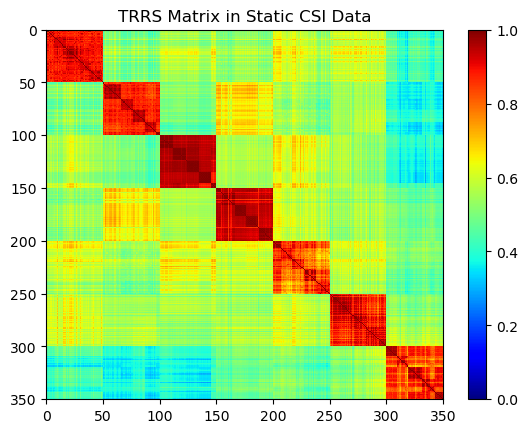

In [76]:
# Calculate TRRS value between every two CSI data
csi_matrix = np.zeros((len(combined), len(combined)))

for i in range(len(combined)):
	for j in range(len(combined)):
		csi_matrix[i][j] = average_trrs((combined[i]), (combined[j]))

cm = plt.cm.get_cmap('jet')
plt.pcolormesh(csi_matrix, cmap=cm)
plt.colorbar()
plt.gca().invert_yaxis()
plt.clim(0,1)
plt.title('TRRS Matrix in Static CSI Data')
plt.show()

By ustilizing the four links together, we can better differenciate CSI from different locations.

**Attention**: Combining multiple links together is one of the methods that can improve the data similarity measurement results. You can also discover other methods, such as choose the best link for analysis, or add weights to different links, etc.

### 2.3 Error Analysis (1 point)

We can only observe the difference, but we cannot measure the difference.

In this section, we will give you a simple method to quantitatively measure how well the data similarity methods can distinguish the CSI datas from different locations.

More specifically, what you need to do is to use the measurement function to analyze different data similarity methods (L1 norm, L2 norm, Dynamic Time Warping, TRRS, etc.) on the CSI data. Finally, you need to give the rank of these data similarity methods.

It is a quite open problem, but don't be afraid.

1) Data Similarity Measurement Function

You could measure the performance of different data similarity methods from multiple aspects. In this section, we will mainly focus on how accurate you could recognize the CSI data from the same location.

We define two sets, the first set $S$ represents the data similarity results within the same location, and the second set $D$ represents the data similarity results from different locations. What we're going to measure is the intersection of these two sets, that is $S \cap D$. The more accurate the data similarity method is, the smaller the intersection of these two sets is.

The equation of the measurement function is given below:
$$
\frac{2}{\frac{|S|}{|S \cap D|} + \frac{|D|}{|S \cap D|}}
$$

We also provide the python version of the measurement function below.

In [77]:
# Define the measurement function
def measurement(S, D):
    # Calculate the range of dataset S and D
    S_range = np.array([np.min(S), np.max(S)])
    D_range = np.array([np.min(D), np.max(D)])
    # Calculate the intersection of range
    range_intersection = np.array([np.max([S_range[0], D_range[0]]), np.min([S_range[1], D_range[1]])])
    if range_intersection[0] >= range_intersection[1]:
        return 0
    
    # Calculate the number of points in range_intersection
    S_interset_num = np.sum((S >= range_intersection[0]) & (S <= range_intersection[1]))
    D_interset_num = np.sum((D >= range_intersection[0]) & (D <= range_intersection[1]))
    
    # Calculate the measurement
    performance = 2 / ((len(S) / S_interset_num) + (len(D) / D_interset_num))

    return performance

2) Analyze Different Data Similarity Methods

First of all, we will give you a brief example of how to analyze TRRS method based on the measurement function.

After that, you need to further analyze at least three data similarity methods (you can choose any data similarity methods you like. You can also design your own data similarity methods.), and give corresponding performance values.

**Analyze TRRS Performance**

In [78]:
# Obtain set S from csi matrix
S = np.array([])
for i in range(len(placeA)):
    for j in range(len(placeA) - i - 1):
        S = np.append(S, average_trrs(placeA[i], placeA[i + j + 1]))
        S = np.append(S, average_trrs(placeB[i], placeB[i + j + 1]))
        S = np.append(S, average_trrs(placeC[i], placeC[i + j + 1]))
        S = np.append(S, average_trrs(placeD[i], placeD[i + j + 1]))
        S = np.append(S, average_trrs(placeE[i], placeE[i + j + 1]))
        S = np.append(S, average_trrs(placeF[i], placeF[i + j + 1]))
        S = np.append(S, average_trrs(placeX[i], placeX[i + j + 1]))

# Obtain set D from csi matrix
D = np.array([])
for i in range(len(placeA)):
    for j in range(len(placeA)):
        D = np.append(D, average_trrs(placeA[i], placeB[j]))
        D = np.append(D, average_trrs(placeA[i], placeC[j]))
        D = np.append(D, average_trrs(placeA[i], placeD[j]))
        D = np.append(D, average_trrs(placeA[i], placeE[j]))
        D = np.append(D, average_trrs(placeA[i], placeF[j]))
        D = np.append(D, average_trrs(placeA[i], placeX[j]))
        D = np.append(D, average_trrs(placeB[i], placeC[j]))
        D = np.append(D, average_trrs(placeB[i], placeD[j]))
        D = np.append(D, average_trrs(placeB[i], placeE[j]))
        D = np.append(D, average_trrs(placeB[i], placeF[j]))
        D = np.append(D, average_trrs(placeB[i], placeX[j]))
        D = np.append(D, average_trrs(placeC[i], placeD[j]))
        D = np.append(D, average_trrs(placeC[i], placeE[j]))
        D = np.append(D, average_trrs(placeC[i], placeF[j]))
        D = np.append(D, average_trrs(placeC[i], placeX[j]))
        D = np.append(D, average_trrs(placeD[i], placeE[j]))
        D = np.append(D, average_trrs(placeD[i], placeF[j]))
        D = np.append(D, average_trrs(placeD[i], placeX[j]))
        D = np.append(D, average_trrs(placeE[i], placeF[j]))
        D = np.append(D, average_trrs(placeE[i], placeX[j]))
        D = np.append(D, average_trrs(placeF[i], placeX[j]))

In [79]:
# Calculate the measurement
performance = measurement(S, D)
print('The performance of TRRS is: ', performance)

The performance of TRRS is:  0.06872186743685171


**Your Analysis**

1) Choose at least three other data similarity methods.
2) Calculate the sets $S$ and $D$ for each data similarity method.
3) Call `measurement()` function to calculate the performance value for each data similarity method.

In [80]:
# YOUR CODE HERE
# 1. L1 norm // since the result of norm is a (4, ) np array, we should get the mean value of these 4 links
S = np.array([])
for i in range(len(placeA)):
    for j in range(len(placeA) - i - 1):
        S = np.append(S, np.mean(np.linalg.norm(placeA[i]-placeA[i + j + 1], ord=1, axis=1)))
        S = np.append(S, np.mean(np.linalg.norm(placeB[i]-placeB[i + j + 1], ord=1, axis=1)))
        S = np.append(S, np.mean(np.linalg.norm(placeC[i]-placeC[i + j + 1], ord=1, axis=1)))
        S = np.append(S, np.mean(np.linalg.norm(placeD[i]-placeD[i + j + 1], ord=1, axis=1)))
        S = np.append(S, np.mean(np.linalg.norm(placeE[i]-placeE[i + j + 1], ord=1, axis=1)))
        S = np.append(S, np.mean(np.linalg.norm(placeF[i]-placeF[i + j + 1], ord=1, axis=1)))
        S = np.append(S, np.mean(np.linalg.norm(placeX[i]-placeX[i + j + 1], ord=1, axis=1)))

# Obtain set D from csi matrix
D = np.array([])
for i in range(len(placeA)):
    for j in range(len(placeA)):
        D = np.append(D, np.mean(np.linalg.norm(placeA[i] - placeB[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeA[i] - placeC[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeA[i] - placeD[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeA[i] - placeE[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeA[i] - placeF[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeA[i] - placeX[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeB[i] - placeC[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeB[i] - placeD[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeB[i] - placeE[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeB[i] - placeF[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeB[i] - placeX[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeC[i] - placeD[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeC[i] - placeE[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeC[i] - placeF[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeC[i] - placeX[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeD[i] - placeE[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeD[i] - placeF[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeD[i] - placeX[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeE[i] - placeF[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeE[i] - placeX[j], ord=1, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeF[i] - placeX[j], ord=1, axis=1)))

performance1 = measurement(S, D)
print('The performance of L1 norm is: ', performance1)


The performance of L1 norm is:  5.74300071787509e-05


In [81]:
# YOUR CODE HERE
# 2. L2 norm //The same reason why we should in use of np.mean :-)
S = np.array([])
for i in range(len(placeA)):
    for j in range(len(placeA) - i - 1):
        S = np.append(S, np.mean(np.linalg.norm(placeA[i]-placeA[i + j + 1], ord=2, axis=1)))
        S = np.append(S, np.mean(np.linalg.norm(placeB[i]-placeB[i + j + 1], ord=2, axis=1)))
        S = np.append(S, np.mean(np.linalg.norm(placeC[i]-placeC[i + j + 1], ord=2, axis=1)))
        S = np.append(S, np.mean(np.linalg.norm(placeD[i]-placeD[i + j + 1], ord=2, axis=1)))
        S = np.append(S, np.mean(np.linalg.norm(placeE[i]-placeE[i + j + 1], ord=2, axis=1)))
        S = np.append(S, np.mean(np.linalg.norm(placeF[i]-placeF[i + j + 1], ord=2, axis=1)))
        S = np.append(S, np.mean(np.linalg.norm(placeX[i]-placeX[i + j + 1], ord=2, axis=1)))

# Obtain set D from csi matrix
D = np.array([])
for i in range(len(placeA)):
    for j in range(len(placeA)):
        D = np.append(D, np.mean(np.linalg.norm(placeA[i] - placeB[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeA[i] - placeC[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeA[i] - placeD[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeA[i] - placeE[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeA[i] - placeF[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeA[i] - placeX[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeB[i] - placeC[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeB[i] - placeD[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeB[i] - placeE[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeB[i] - placeF[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeB[i] - placeX[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeC[i] - placeD[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeC[i] - placeE[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeC[i] - placeF[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeC[i] - placeX[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeD[i] - placeE[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeD[i] - placeF[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeD[i] - placeX[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeE[i] - placeF[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeE[i] - placeX[j], ord=2, axis=1)))
        D = np.append(D, np.mean(np.linalg.norm(placeF[i] - placeX[j], ord=2, axis=1)))

performance2 = measurement(S, D)
print('The performance of L2 Norm is: ', performance2)


The performance of L2 Norm is:  0.033345469327159295


In [82]:
from scipy.stats import wasserstein_distance as wd0
def wd(A, B):
    foo = []
    for i in range(4):
        foo.append(wd0(A[i], B[i]))
    return np.mean(foo)

S = np.array([])
for i in range(len(placeA)):
    for j in range(len(placeA) - i - 1):
        S = np.append(S, wd(placeA[i], placeA[i + j + 1]))
        S = np.append(S, wd(placeB[i], placeB[i + j + 1]))
        S = np.append(S, wd(placeC[i], placeC[i + j + 1]))
        S = np.append(S, wd(placeD[i], placeD[i + j + 1]))
        S = np.append(S, wd(placeE[i], placeE[i + j + 1]))
        S = np.append(S, wd(placeF[i], placeF[i + j + 1]))
        S = np.append(S, wd(placeX[i], placeX[i + j + 1]))

# Obtain set D from csi matrix
D = np.array([])
for i in range(len(placeA)):
    for j in range(len(placeA)):
        D = np.append(D, wd(placeA[i], placeB[j]))
        D = np.append(D, wd(placeA[i], placeC[j]))
        D = np.append(D, wd(placeA[i], placeD[j]))
        D = np.append(D, wd(placeA[i], placeE[j]))
        D = np.append(D, wd(placeA[i], placeF[j]))
        D = np.append(D, wd(placeA[i], placeX[j]))
        D = np.append(D, wd(placeB[i], placeC[j]))
        D = np.append(D, wd(placeB[i], placeD[j]))
        D = np.append(D, wd(placeB[i], placeE[j]))
        D = np.append(D, wd(placeB[i], placeF[j]))
        D = np.append(D, wd(placeB[i], placeX[j]))
        D = np.append(D, wd(placeC[i], placeD[j]))
        D = np.append(D, wd(placeC[i], placeE[j]))
        D = np.append(D, wd(placeC[i], placeF[j]))
        D = np.append(D, wd(placeC[i], placeX[j]))
        D = np.append(D, wd(placeD[i], placeE[j]))
        D = np.append(D, wd(placeD[i], placeF[j]))
        D = np.append(D, wd(placeD[i], placeX[j]))
        D = np.append(D, wd(placeE[i], placeF[j]))
        D = np.append(D, wd(placeE[i], placeX[j]))
        D = np.append(D, wd(placeF[i], placeX[j]))


performance3 = measurement(S, D)
print('The performance of EMD is: ', performance3)

# END OF YOUR CODE

The performance of EMD is:  0.19004864104751149


3) Rank Different Data Similarity Methods

Based on the performance values you calculated, you need to rank these data similarity methods. The lower the performance value is, the better the data similarity method is.

In [83]:
# YOUR CODE HERE
ranking = [(performance3, "EMD"), (performance1, "L1 norm"), (performance2, "L2 norm")]
ranking.sort()
print("The lowest performance value is ", ranking[0][0], "which is best method: ", ranking[0][1])
print("The middle value is ", ranking[1][0], " which is method: ", ranking[1][1])
print("The largest value is ", ranking[2][0], " which is method: ", ranking[2][1])
# END OF YOUR CODE

The lowest performance value is  5.74300071787509e-05 which is best method:  L1 norm
The middle value is  0.033345469327159295  which is method:  L2 norm
The largest value is  0.19004864104751149  which is method:  EMD


### 2.4 Location Prediction (1 point)

Based on above analysis, I believe that you are getting more familiar with the data similarity implementation in WiFi localization. In this section, you are required to predict the location of a given CSI data by using the best data similarity method you discovered or developed in the above section.

We have collected more CSI data from these seven locations under two circumstances: static and dynamic. The static data is collected in the static environment, and the dynamic data is collected when there is a person moving around. You need to predict the location of the receiver for both cases.

We use numerical labels to represent different locations:
```
A: 0; B: 1; C: 2; D: 3; E: 4; F: 5; X: 6
```

In [84]:
# Load CSI data for both static and wandering conditions
static_csi = np.load('./csi_data/static.npy')
wandering_csi = np.load('./csi_data/wander.npy')
static_label = np.load('./csi_data/static_label.npy')
wandering_label = np.load('./csi_data/wander_label.npy')

You need to choose one data similarity method to predict the location of the receiver in both cases (static & dynamic).

In [85]:
# YOUR CODE HERE
# print(static_csi.shape) // 350*4*242
# print(wandering_csi.shape)
# print(static_label.shape) // 350
# print(wandering_label.shape)
# Pilot subcarriers indexes
static_csi = np.abs(static_csi)
wandering_csi = np.abs(wandering_csi)
pilot_subcarrier = [6, 32, 74, 100, 141, 167, 209, 235]
# Delete pilot subcarriers (no information provided)
static_csi = np.delete(static_csi, pilot_subcarrier, axis = 2)
wandering_csi = np.delete(wandering_csi, pilot_subcarrier, axis=2)
# Do nomalization for each subcarrier
static_csi = (static_csi / np.linalg.norm(static_csi, axis=2, keepdims=True))
wandering_csi = (wandering_csi / np.linalg.norm(wandering_csi, axis=2, keepdims=True))
# Substract mean value of all subcarriers
static_csi = static_csi - np.mean(static_csi)
wandering_csi = wandering_csi - np.mean(wandering_csi)
# selected method: L1 norm
# myPrediction(foo): get the predicted place
# foo: 4*2xx matrix, which is the signal we receive

In [86]:
def myPrediction(foo):
    ans = []
    l1A = 0
    l1B = 0
    l1C = 0
    l1D = 0
    l1E = 0
    l1F = 0
    l1X = 0
    for i in range(len(placeA)):
        l1A += np.mean(np.linalg.norm(placeA[i] - foo, ord=1, axis = 1))
        l1B += np.mean(np.linalg.norm(placeB[i] - foo, ord=1, axis = 1))
        l1C += np.mean(np.linalg.norm(placeC[i] - foo, ord=1, axis = 1))
        l1D += np.mean(np.linalg.norm(placeD[i] - foo, ord=1, axis = 1))
        l1E += np.mean(np.linalg.norm(placeE[i] - foo, ord=1, axis = 1))
        l1F += np.mean(np.linalg.norm(placeF[i] - foo, ord=1, axis = 1))
        l1X += np.mean(np.linalg.norm(placeX[i] - foo, ord=1, axis = 1))
    ans.append((l1A, 0))
    ans.append((l1B, 1))
    ans.append((l1C, 2))
    ans.append((l1D, 3))
    ans.append((l1E, 4))
    ans.append((l1F, 5))
    ans.append((l1X, 6))
    minvalue = min(ans, key=lambda x: x[0])
    return minvalue[1]# return the label, not return the tuple

my_static_prediction = []
my_wandering_prediction = []

for i in range(350):
    my_static_prediction.append(myPrediction(static_csi[i]))
    my_wandering_prediction.append(myPrediction(wandering_csi[i]))  
  

# END OF YOUR CODE

# Prediction results
static_prediction = np.array(my_static_prediction) # please replace your prediction result of static condition here
wandering_prediction = np.array(my_wandering_prediction) # please replace your prediction result of wandering condition here

Evaluate the prediction accuracy.

In [87]:
# Evaluate the prediction accuracy
# Calculate the precision of static and wandering conditions
static_precision = np.sum(static_prediction == static_label) / len(static_label)
wandering_precision = np.sum(wandering_prediction == wandering_label) / len(wandering_label)
print('The precision of static condition is: {}'.format(static_precision))
print('The precision of wandering condition is: {}'.format(wandering_precision))

The precision of static condition is: 1.0
The precision of wandering condition is: 0.6428571428571429


### 2.5 Movement Detection (1 point)

With the fundamental knowledge of TRRS or data similarity implementations of CSI data, it is straightforward for us to realize that we could use data similarity to detect the movement of the receiver (Rx). Take TRRS as an example. If the receiver is static, the TRRS value between current frame and previous frame should be close to $1$. If the receiver is moving, the TRRS value between current frame and previous frame should decrease to a certain extent. This difference could also be observed if you apply other similarity methods.

In this section, you need to choose whatever data similarity method you like to detect the movement of the receiver. Additionally, you need to set a suitable threshold to determine whether the receiver is moving or not.

Note that the data collection system used in this section is different from previous ones. The transmitter and receiver have three antennas each. And the number of subcarriers is $30$. And we will only use the first antenna set on the robot to detect the movement of the receiver.

The following codes are provided for loading the data. You can just run the code. If you are interested in how the data is pre-processed, you can also have a look at the code.

In [88]:
# read .mat file
import scipy
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.ticker import FormatStrFormatter

def read_mat_file(file_path):
    """
    Input
    file_path: path of .mat file
    Output
    csi_timestamps: timestamps of csi data
    csi_data: csi data (amplitude)
    """
    temp = sio.loadmat(file_path)['temp']
    # load csi timestamps and csi data
    csi_timestamps = temp['timestamp'][0][0]
    # convert timestamp to seconds
    csi_timestamps = csi_timestamps / 1e6
    # reshape csi timestamps
    csi_timestamps = csi_timestamps.reshape(csi_timestamps.shape[0])
    csi_data = temp['csi'][0][0]

    # down sample csi data from 500Hz to 100Hz
    csi_timestamps = csi_timestamps[::5]
    csi_data = csi_data[::5]

    return csi_timestamps, np.abs(csi_data)

def interplotation(timestamps, csi):
    """
    This function is used to interplotate csi data
    according to timestamps
    Params:
    Input:
    timestamps: timestamps of csi data
    csi: csi data [idx, dim, Nrx, Ntx]
    Output
    timestamps: timestamps of csi data after interpolation
    csi: csi data after interpolation [idx, Nrx, Ntx, dim]
    """
    # obtain dim, Nrx, Ntx
    dim, Ntx, Nrx = csi.shape[1], csi.shape[2], csi.shape[3]
    # First reshape csi data
    csi_data = csi.copy()
    csi_data = csi_data.reshape(csi_data.shape[0], -1)
    # timestamps is collected under 100Hz
    inter_timestamps = np.arange(timestamps[0], timestamps[-1], 0.01)
    # interplotation for csi data
    func = scipy.interpolate.interp1d(timestamps, csi_data, axis=0, fill_value="extrapolate")
    inter_csi = func(inter_timestamps)
    # reshape inter_csi into original shape
    inter_csi = inter_csi.reshape(inter_csi.shape[0], dim, Ntx, Nrx)
    inter_csi = inter_csi.transpose(0,2,3,1)

    return inter_timestamps, inter_csi

In [89]:
csi_timestamps, csi_data = read_mat_file('./csi_data/forward-backward.mat')
inter_timestamps, inter_csi = interplotation(csi_timestamps, csi_data)

# In this lab, we use the first antenna for demonstration
antenna1  = inter_csi[:, :, 0, :]
# The length of the CSI data
print('The length of the CSI data is: {}'.format(antenna1.shape[0]))
# The number of Rx antennas
print('The number of Rx antennas is: {}'.format(antenna1.shape[1]))
# The number of CSI subcarriers
print('The number of CSI subcarriers is: {}'.format(antenna1.shape[2]))

The length of the CSI data is: 6849
The number of Rx antennas is: 3
The number of CSI subcarriers is: 30


For your convenience, we provided the movement detection framework below. What you need to do is to fill in two parts for this class.

The first part is define the data similarity method you want to use (TRRS is also available).
The second part is to set a suitable threshold to determine whether the receiver is moving or not.

Please read carefully of the following codes and comments to fill in the codes.

In [90]:
# movement detection threshold
# YOUE CODE HERE
THRESHOLD = 0.97
# END OF YOUR CODE

# movement detection class
class Movement_Detection:
    """
    This class is used to detect movement
    """
    def __init__(self, data, timestamps, time_lag):
        # CSI collected from one antenna
        self.data = data
        # timestamps
        self.timestamps = timestamps
        # time lag for movement detection (time lag = 0.01s * time_lag)
        self.time_lag = time_lag
        # movement indicator
        self.movement_indicator = self.calculate_movement()

    def moving_timestamps(self):
        """
        This function is used to calculate the timestamps of movement
        """
        # Set the moving detection threshold
        # An example of using TRRS:
        # moving_timestamps = list(map(lambda x: x[0], np.argwhere(self.movement_indicator <= THRESHOLD)))
        # YOUR CODE HERE
        moving_timestamps = []
        for index, v in enumerate(self.movement_indicator):
            fo = v[0]
            if fo < THRESHOLD:
                moving_timestamps.append(100*self.timestamps[index])
        # print(moving_timestamps)
        # END OF YOUR CODE

        return moving_timestamps

    def calculate_movement(self):
        """
        This function is used to calculate movement
        """
        movement_indicator = np.zeros((self.data.shape[0] - self.time_lag, 1))
        for i in range(self.data.shape[0] - self.time_lag):
            movement_indicator[i] = self.data_similarity(self.data[i + self.time_lag], self.data[i])

        # Fill in the missing data using the first value
        movement_indicator = np.concatenate((movement_indicator[0] * np.ones((self.time_lag, 1)),
                                             movement_indicator))

        return movement_indicator

    def data_similarity(self, data1, data2):
        """
        This function is used to calculate the similarity between two CSI data
        """
        # YOUR CODE HERE
        # Same fomula of average_trrs
        kappa = 0
        for i in range(len(data1)):
        # trrs implemented from above
            kappa += trrs(data1[i,:], data2[i,:])
        output = kappa/len(data1)
        # END OF YOUR CODE

        return output

Then, you need to use your data similarity method to detect the movement of the receiver. You need to run the code and see what will happen.

The following picture is a reference of the movement detection result of TRRS method. The blue lines represent the TRRS value between two adjacent frames. The gray parts denote the movement of the receiver has been detected.

<img src="Movement-detection.jpg" width=500 height=250 />

What you are gonna do is to use your data similarity method to detect the movement of the receiver. If fortunately, you could get a similar result as the above one.

Load data for movement detection.

In [91]:
# Load CSI data and its timestamps
movement_csi = np.load('./csi_data/movement-detection_csi.npy')
movement_ts = np.load('./csi_data/movement-detection_ts.npy')
# Convert the timestamps to seconds
movement_ts -= movement_ts[0]
movement_ts = movement_ts / 10**9

Visualize the results.

C:\Users\sygra\AppData\Local\Temp\ipykernel_32752\8206227.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  movement_indicator[i] = self.data_similarity(self.data[i + self.time_lag], self.data[i])


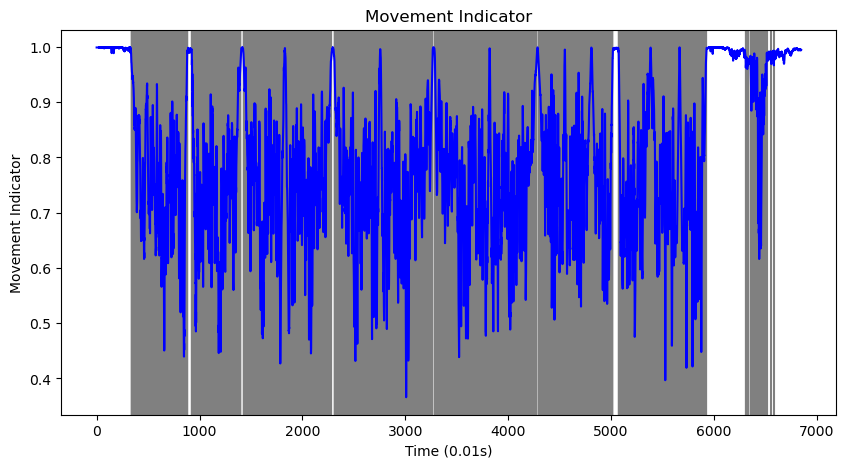

In [92]:
movement_detection = Movement_Detection(antenna1, inter_timestamps, 20)
movement_indicator = movement_detection.calculate_movement()
moving_timestamps = movement_detection.moving_timestamps()

# plot movement indicator
fig, ax1 = plt.subplots(figsize = (10, 5))
# plot movement timestamps
for i in range(len(moving_timestamps)):
    ax1.axvline(x = moving_timestamps[i], color = 'gray')
ax1.plot(movement_indicator, color = 'blue')
ax1.set_xlabel('Time (0.01s)')
ax1.set_ylabel('Movement Indicator')
ax1.set_title('Movement Indicator')
plt.show()